In [70]:
!pip install PySastrawi

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dzikr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import random
import json
import pickle
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
import pandas as pd
from openpyxl import load_workbook
import datetime

In [85]:
# Load the intents file
with open('new.json') as data_file:
    intents = json.load(data_file)

In [100]:
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

# Pre-processing
words = []
classes = []
documents = []
ignore = ['!', '"', "'", '(', ')', ',', '-', '.', ':', ';', '?', '[', ']', '_',
          'adalah', 'akan', 'aku', 'anda', 'atau', 'dalam', 'dan',
          'dari', 'dengan', 'di', 'dia', 'harus', 'ini', 'itu', 'jika', 'kami', 'kamu', 'ke',
          'kita', 'mereka', 'oleh', 'pada', 'saya', 'sebuah', 'sedang', 'sementara', 'tanpa',
          'tapi', 'telah', 'untuk', 'yang', '{', '}']



#tokenize
for intent in intents:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern.lower())  # Tokenizing and converting to lowercase
        words.extend([word for word in w if word not in ignore])  # Exclude words in ignore list
        documents.append((w, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dzikr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [101]:
# Melakukan stemming dan normalisasi data
words = [stemmer.stem(w.lower()) for w in words if w not in ignore]
words = sorted(list(set(words)))

# Menghapus class duplikat dengan 'set'
classes = sorted(list(set(classes)))

print(len(documents), "documents")
print(len(classes), "classes", classes)
print(len(words), "unique stemmed words", words)

874 documents
42 classes ['apa_itu_gangguan_mental', 'badmood_dampak', 'badmood_efek_jangka_panjang', 'badmood_gejala', 'badmood_pengobatan', 'badmood_penyebab', 'badmood_preventif', 'badmood_solusi_pribadi', 'badmood_terhadap_kesehatan_fisik', 'badmood_terhadap_pekerjaan', 'bunuh_diri', 'cara_mengatasi_gangguan_mental', 'diagnosis_gangguan_mental', 'dukungan_mental_terapi', 'efek_gangguan_mental', 'gangguan_mental_dan_bipolar', 'gangguan_mental_dan_depresi', 'gangguan_mental_dan_kecemasan', 'gangguan_mental_dan_psikoedukasi', 'gangguan_mental_dan_psikoterapi', 'gangguan_mental_dan_stigma', 'gangguan_mental_untuk_anak', 'gejala_gangguan_mental', 'kabar_baik', 'kabar_buruk', 'kabar_netral', 'mood_bahagia', 'mood_cemas', 'mood_marahan', 'mood_sedih', 'penanganan_gangguan_mental', 'pencegahan_gangguan_mental', 'pengobatan_gangguan_mental', 'penyebab_gangguan_mental', 'perbedaan_gangguan_mental_dan_stres', 'perkenalan_diri', 'perpisahan', 'sapaan_pagi', 'sapaan_tanya_kabar', 'tanya_bantuan

In [102]:
import random
import numpy as np

training = []
output_empty = [0] * len(classes)

for doc in documents:
    pattern_words = [stemmer.stem(word.lower()) for word in doc[0]]
    bag = [1 if w in pattern_words else 0 for w in words]

    output_row = output_empty[:]
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training, dtype=object)

train_x = np.array([item[0] for item in training])
train_y = np.array([item[1] for item in training])


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, callbacks, models
import tensorflow as tf

# Reset the default TensorFlow graph
tf.compat.v1.reset_default_graph()

# Split the dataset
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

# Define the model
model = models.Sequential([
    layers.Input(shape=(len(train_x[0]),), name='input_layer'),
    
    # Layer 1 dengan BatchNormalization
    layers.Dense(256, activation='relu', kernel_regularizer='l2', name='hidden_layer1'),
    layers.BatchNormalization(),  # Menambahkan BatchNormalization
    layers.Dropout(0.3, name='dropout1'),  # Meningkatkan Dropout untuk regularisasi
    
    # Layer 2 dengan BatchNormalization
    layers.Dense(128, activation='relu', kernel_regularizer='l2', name='hidden_layer2'),
    layers.BatchNormalization(),  # Menambahkan BatchNormalization
    layers.Dropout(0.3, name='dropout2'),  # Meningkatkan Dropout untuk regularisasi
    
    # Layer output
    layers.Dense(len(train_y[0]), activation='softmax', name='output_layer')
])


# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
tensorboard_callback = callbacks.TensorBoard(log_dir='./logs')
early_stopping_callback = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_x, train_y,
    validation_data=(val_x, val_y),
    epochs=500,
    batch_size=8,
    callbacks=[tensorboard_callback],
    verbose=1
)

# Save the model
model.save('model.h5')


Epoch 1/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0193 - loss: 9.5173 - val_accuracy: 0.0312 - val_loss: 8.2355
Epoch 2/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0527 - loss: 8.7381 - val_accuracy: 0.0312 - val_loss: 8.0355
Epoch 3/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0769 - loss: 8.2389 - val_accuracy: 0.0312 - val_loss: 7.8178
Epoch 4/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1144 - loss: 7.7259 - val_accuracy: 0.0469 - val_loss: 7.5360
Epoch 5/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1339 - loss: 7.3571 - val_accuracy: 0.1094 - val_loss: 7.2186
Epoch 6/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1574 - loss: 6.9536 - val_accuracy: 0.1719 - val_loss: 6.8783
Epoch 7/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1748 - loss: 6.8244 - val_accuracy: 0.2656 - val_loss: 6.5407
Epoch 8/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2180 - loss: 6.4229 - val_accuracy: 0.2812 - v

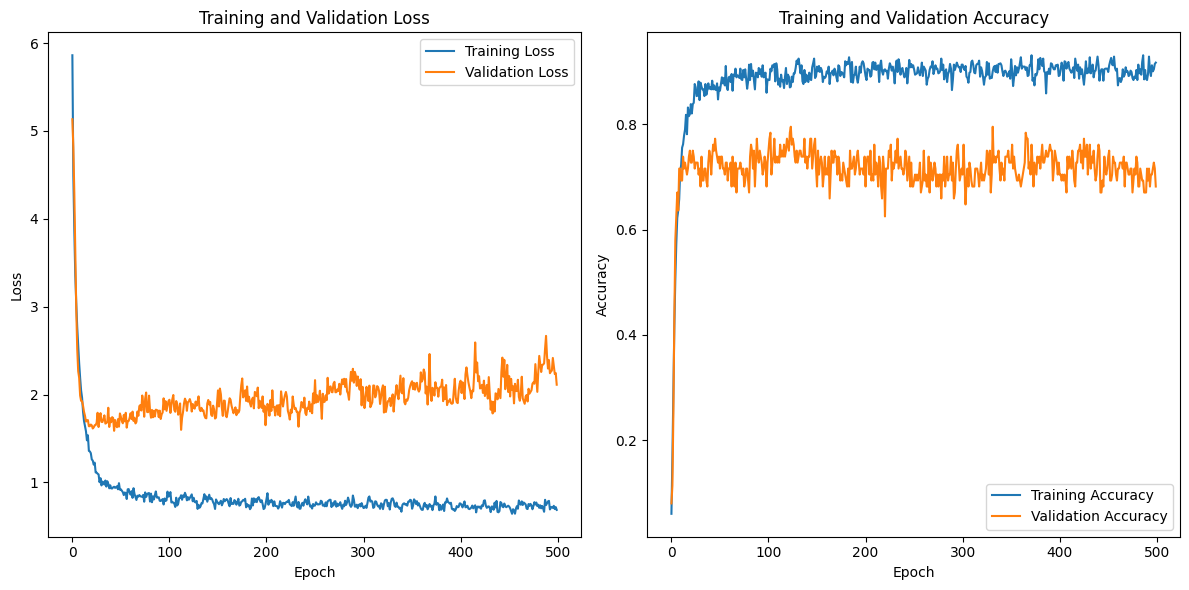

In [105]:
import matplotlib.pyplot as plt

# Visualize the training and validation loss
plt.figure(figsize=(12, 6))

# Plotting the loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
import json

# Save
try:
    with open("training_data.json", "w") as file:
        # Convert non-serializable data like NumPy arrays or other objects to lists
        data = {'words': words, 'classes': classes, 'train_x': train_x.tolist(), 'train_y': train_y.tolist()}
        json.dump(data, file)
except IOError as e:
    print(f"Error saving training data: {e}")

In [16]:
# Save
try:
    with open("training_data", "wb") as file:
        pickle.dump({'words': words, 'classes': classes, 'train_x': train_x, 'train_y': train_y}, file)
except IOError as e:
    print(f"Error saving training data: {e}")

In [55]:
# Load
try:
    with open("training_data", "rb") as file:
        data = pickle.load(file)

    words = data['words']
    classes = data['classes']
    train_x = np.array(data['train_x'])
    train_y = np.array(data['train_y'])
except IOError as e:
    print(f"Error loading training data: {e}")

# Load model
try:
    model = keras.models.load_model('model.h5')
except IOError as e:
    print(f"Error loading model: {e}")


In [70]:
def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = np.zeros(len(words), dtype=np.float32)
    for idx, w in enumerate(words):
        if w in sentence_words:
            bag[idx] = 1
            if show_details:
                print(f"Found in bag: {w}")
    return bag

ERROR_THRESHOLD = 0.70



def classify(sentence):
    input_data = bow(sentence, words)
    results = model.predict(np.array([input_data]))[0]
    results = [[i, r] for i, r in enumerate(results) if r >= ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return [(classes[r[0]], r[1]) for r in results]

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    if results:
        for intent in intents:
            if intent['tag'] == results[0][0]:
                return random.choice(intent['responses'])
    return "Maaf, saya belum mengerti apa yang Anda bicarakan, perlu bantuan?."

In [71]:
clean_up_sentence("halo perkenalkan nama saya adalah")

['halo', 'perkenalkan', 'nama', 'saya', 'adalah']

In [21]:
print("0 to close")
while True:
    message = input("")
    if message == "0":
        break
    result = response(message)

    if result is not None and "~" in result:
        order = (result[1:])
        action(order)
    else:
        print(result)


0 to close


 hai


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Maaf, saya belum mengerti apa yang Anda bicarakan, perlu bantuan?.


 halo


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Halo di sana, ada yang bisa kubantu?


KeyboardInterrupt: Interrupted by user

In [ ]:
model = tf.keras.models.load_model('model.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open('model.tflite', 'wb') as f:
  f.write(tflite_model)